In [2]:
import numpy as np
import matplotlib.pyplot as plt

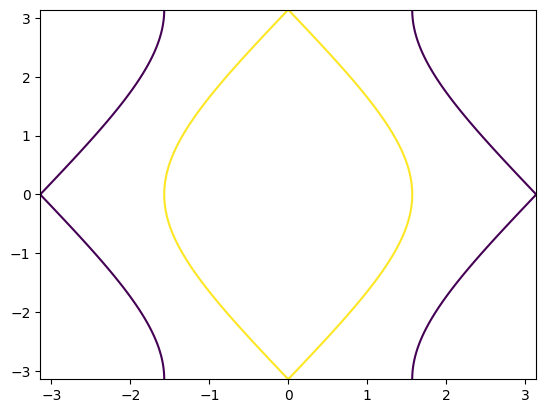

In [13]:
M = 1
m = 1

theta_0 = np.linspace(-np.pi, np.pi, 1000)
phi_0 = np.linspace(-np.pi, np.pi, 1000)
x, y = np.meshgrid(theta_0, phi_0)

U_min = M*np.cos(x) + m*np.cos(x) + m*np.cos(y)

plt.contour(x, y, U_min, levels=[-M, M])